# Identify markers for interVE with Decision Tree

In [1]:
import glob
import os

import anndata
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scanpy as sc
import xgboost as xgb
from pylab import rcParams
from read_roi import read_roi_zip
from shapely import geometry
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error

random_seed = 12345

In [2]:
clusters = ['DE1', 'Liver', 'DE2', 'Midgut', 'Hindgut2', 'Foregut', 'Hindgut1', 'InterVE', 'AVE', 'EmVE', 'ExVE1', 'ExVE2']

genes = ['Actb', 'Gm10076', 'Rpl13a', 'mmu-mir-703', 'Tceb2', 'H3f3a', 'Mdk', 'Nedd4', 'Actn4', 
         'Gnai2', '2900073G15Rik', 'Slc2a1', 'Cldn6', 'Ubc', 'Emb', 'Fth1', 'Slc2a3', 'Krt18', 'Krt8', 'Ptprf', 
         'Epcam', 'Fn1', 'Atn1', 'Cd24a', 'Marcksl1', 'Tmsb10', 'Tuba1a', 'Gm3788', 'Cnn3', 'Flna', 'Basp1', 'Cpm', 
         'Ier2', 'Krt19', 'Cnn2', 'Ifitm1', 'Fgfr1', 'Trp53i11', 'Tmprss2', 'Sp5', 'Slc39a8', 'Gpx2', 'Myl6b', 'Trh',
         'Gsn', 'Pdzk1ip1', 'Plat', 'Sat1', 'Slc39a4', 'Lima1', 'Cbx7', 'Trap1a', 'Degs1', 'Peg10', 'Nid2', 'Lpar1',
         'Mt1', 'Mt2', 'Mogat2', 'Rab4a', 'Sepp1', 'Glrx', 'Ctsc', 'Prss12', 'Fmr1nb', 'Slc7a7', 'Lgmn', 'Amn', 'Ctsh', 
         'Apoc1', 'Slc13a4', 'Rbp1', 'Car2', 'Gpc3', 'Slc16a1', 'Slc9a3r1', 'Cotl1', 'Apoe', 'Ctsl', 'Lamp1', 'Car4', 
         'Podxl', 'Snx3', 'Cd63', 'Ezr', 'Oat', 'Sparc', 'Cldn7', 'Laptm4b', 'Cstb', 'S100a10', 'Itm2b', 'Col4a1', 'Cst3', 'Tagln2']

In [3]:
adata = sc.read("../data/processed/01_raw_counts.h5ad")
metadata = pd.read_csv("../data/processed/02_metadata.csv", index_col=0)

adata = adata[metadata.index, genes]
adata.obs = metadata

adata = adata[adata.obs.cluster_names.isin(clusters)]

In [4]:
metadata.cluster_names.unique()

array(['ExVE2', 'InterVE', 'PS1', 'EmVE', 'DE2', 'FP', 'DE1', 'Node',
       'PS2', 'AVE', 'PE', 'ExVE1', 'Notochord', 'Midgut', 'Foregut',
       'Hindgut1', 'Hindgut2', 'Liver'], dtype=object)

In [5]:
adata.obs.cluster_names.unique()

array(['ExVE2', 'InterVE', 'EmVE', 'DE2', 'DE1', 'AVE', 'ExVE1', 'Midgut',
       'Foregut', 'Hindgut1', 'Hindgut2', 'Liver'], dtype=object)

In [6]:
sc.pp.normalize_total(adata, target_sum=10_000)
sc.pp.log1p(adata)

adata.raw = adata

/opt/conda/envs/squidpy/lib/python3.8/site-packages/scanpy/preprocessing/_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


... storing 'orig.ident' as categorical
... storing 'Well_coordinates' as categorical
... storing 'Amp_batch_ID' as categorical
... storing 'Cell_barcode' as categorical
... storing 'Pool_barcode' as categorical
... storing 'Batch' as categorical
... storing 'Condition' as categorical
... storing 'SampleName' as categorical
... storing 'Stage' as categorical
... storing 'Source' as categorical
... storing 'SubGroup' as categorical
... storing 'Day' as categorical
... storing 'Phase' as categorical
... storing 'cluster_names' as categorical


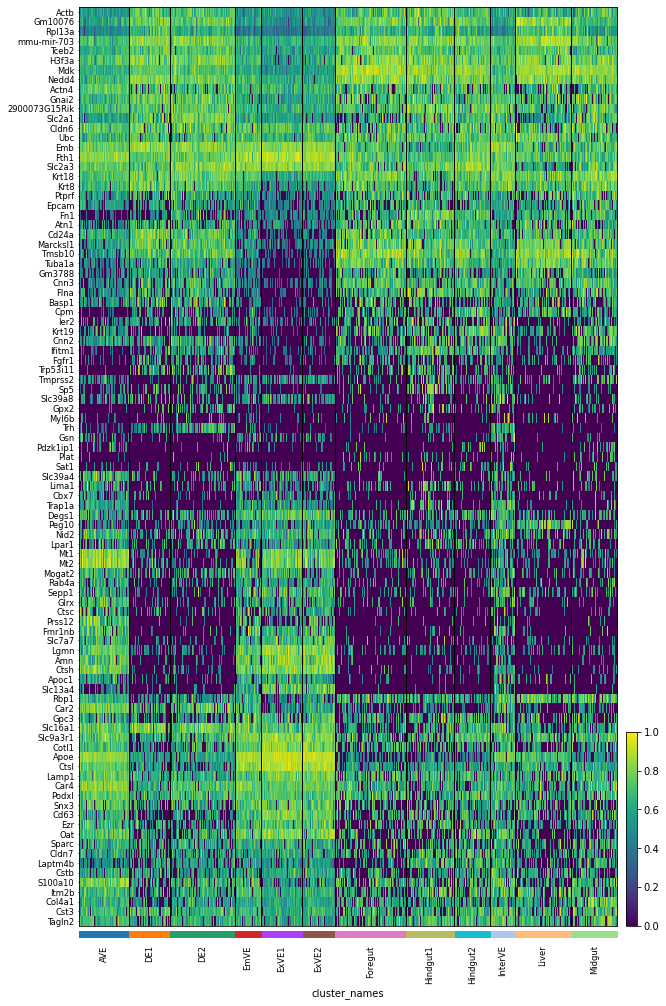

In [7]:
sc.pl.heatmap(
    adata, 
    var_names=adata.var_names,
#     categories_order=['eDE', 'Liver', 'aDE', 'Midgut', 'Hindgut2', 'Foregut', 'Hindgut1', 'InterVE', 'AVE', 'EmVE', 'ExVE1', 'ExVE2'],
    groupby="cluster_names", 
    standard_scale='var', 
    swap_axes=True, 
    show_gene_labels=True
)

In [8]:
!jupyter nbconvert --to html 11_dt.ipynb --output-dir="../reports"

[NbConvertApp] Converting notebook 11_dt.ipynb to html
[NbConvertApp] Writing 870416 bytes to ../reports/11_dt.html
